In [1]:
import cv2
import imageTransport
import zmq
import numpy as np
import json
from functools import partial
import argparse
import logging
import threading
import falconBase
import sep
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
class falconViewer(falconBase.falconBase):
    def __init__(self,cameraServerIP='localhost'):
        logging.info("Starting falcon Camara Viewer")
        super().__init__(cameraServerIP)   
    def shoot(self):
        queue, image = self.image_hub.recv_any()
        self.msg=json.loads(queue)
        k=cv2.waitKey(1)
        if self.msg['image_type']=='jpg':
            img=cv2.imdecode(image,1)
        else:
            img=image
        return img

In [3]:
f=falconViewer()

2020-11-15 00:48:56,747 INFO:falconBase Starting falcon Camara Viewer
2020-11-15 00:48:56,748 INFO:falconBase Starting falcon Camara Viewer


{'Gain': {'Name': 'Gain', 'Description': 'Gain', 'MaxValue': 570, 'MinValue': 0, 'DefaultValue': 200, 'IsAutoSupported': True, 'IsWritable': True, 'ControlType': 0}, 'Exposure': {'Name': 'Exposure', 'Description': 'Exposure Time(us)', 'MaxValue': 2000000000, 'MinValue': 32, 'DefaultValue': 10000, 'IsAutoSupported': True, 'IsWritable': True, 'ControlType': 1}, 'WB_R': {'Name': 'WB_R', 'Description': 'White balance: Red component', 'MaxValue': 99, 'MinValue': 1, 'DefaultValue': 52, 'IsAutoSupported': True, 'IsWritable': True, 'ControlType': 3}, 'WB_B': {'Name': 'WB_B', 'Description': 'White balance: Blue component', 'MaxValue': 99, 'MinValue': 1, 'DefaultValue': 95, 'IsAutoSupported': True, 'IsWritable': True, 'ControlType': 4}, 'Offset': {'Name': 'Offset', 'Description': 'offset', 'MaxValue': 80, 'MinValue': 0, 'DefaultValue': 8, 'IsAutoSupported': False, 'IsWritable': True, 'ControlType': 5}, 'BandWidth': {'Name': 'BandWidth', 'Description': 'The total data transfer rate percentage', '

In [4]:
img=f.shoot()
img_data=gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype('<f8')
print(img_data.shape)


(564, 828)


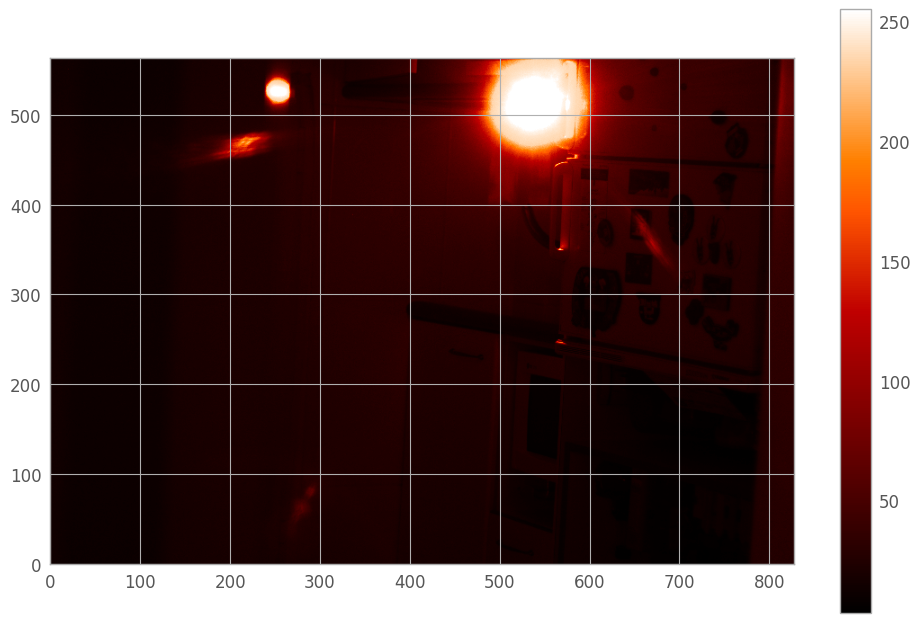

In [5]:
plt.figure()
plt.imshow(img_data, origin='lower')
plt.colorbar()

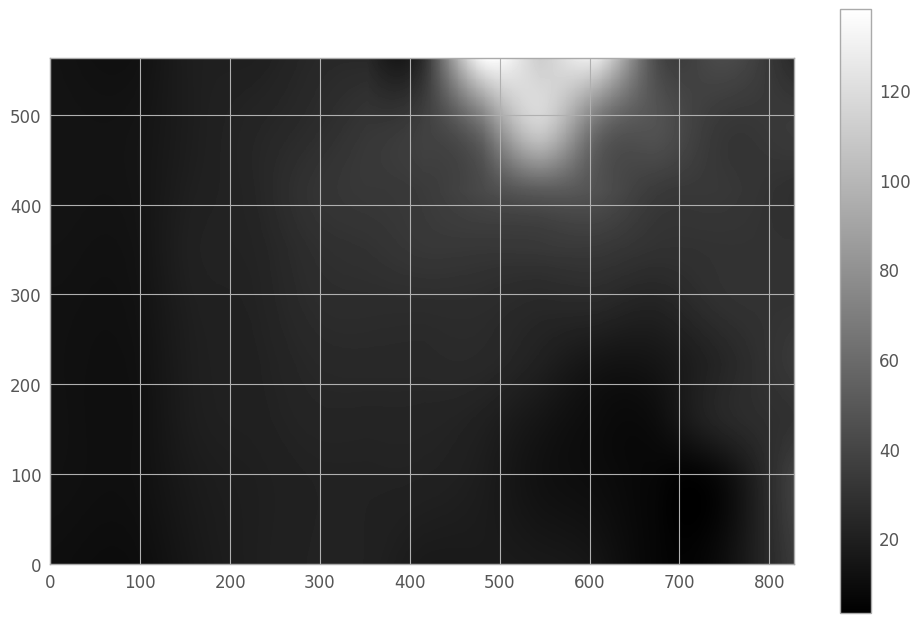

In [6]:
bkg = sep.Background(img_data)
# show the background
plt.imshow(bkg, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [7]:
thresh = 1.5 * bkg.globalrms
# subtract the background
data_sub = img_data - bkg
objects = sep.extract(data_sub, thresh)

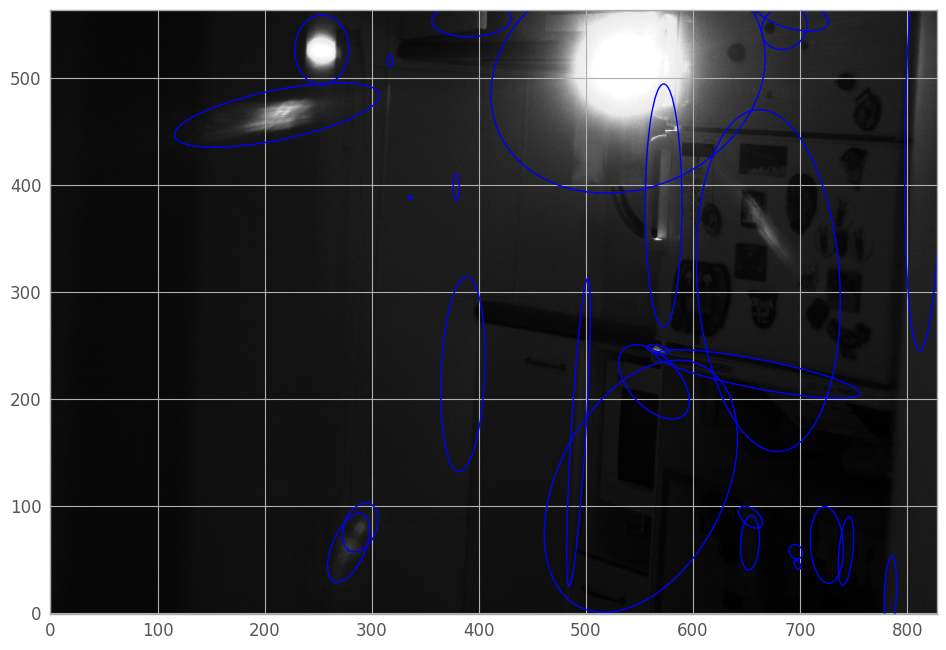

In [8]:
from matplotlib.patches import Ellipse
import numpy as np

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(img_data, cmap='gray', origin='lower')
# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('blue')
    ax.add_artist(e)

In [14]:
idx=objects['cflux'].argmax()
objects['x1'][idx]

ValueError: no field of name x1